In [61]:
import pandas as pd

from pathlib import Path

# Import plotnine for ggplot2 like plotting
from plotnine import ggplot, aes, facet_wrap, labs, theme
# Import plotnine geoms to plot
from plotnine import geom_boxplot, geom_histogram, geom_bar
# Formating
from plotnine import element_text, scale_x_continuous, scale_y_continuous
from mizani.formatters import percent_format, currency_format

In [6]:
PATH_DATA = Path("data")

# EDA: Análisis e insights

In [7]:
items_data = pd.read_csv(PATH_DATA / "preprocessed_EDA_data.csv")

## Discount rate

Cerca del 21% de todos los items cuentan con descuento, todos los demás no.

In [8]:
items_data['has_discount'].value_counts(normalize=True)

has_discount
False    0.782488
True     0.217512
Name: proportion, dtype: float64

La mayor cantidad de items (al menos 75% de los productos que si tienen algún descuento) cuentan con descuentos por debajo del 21%. 

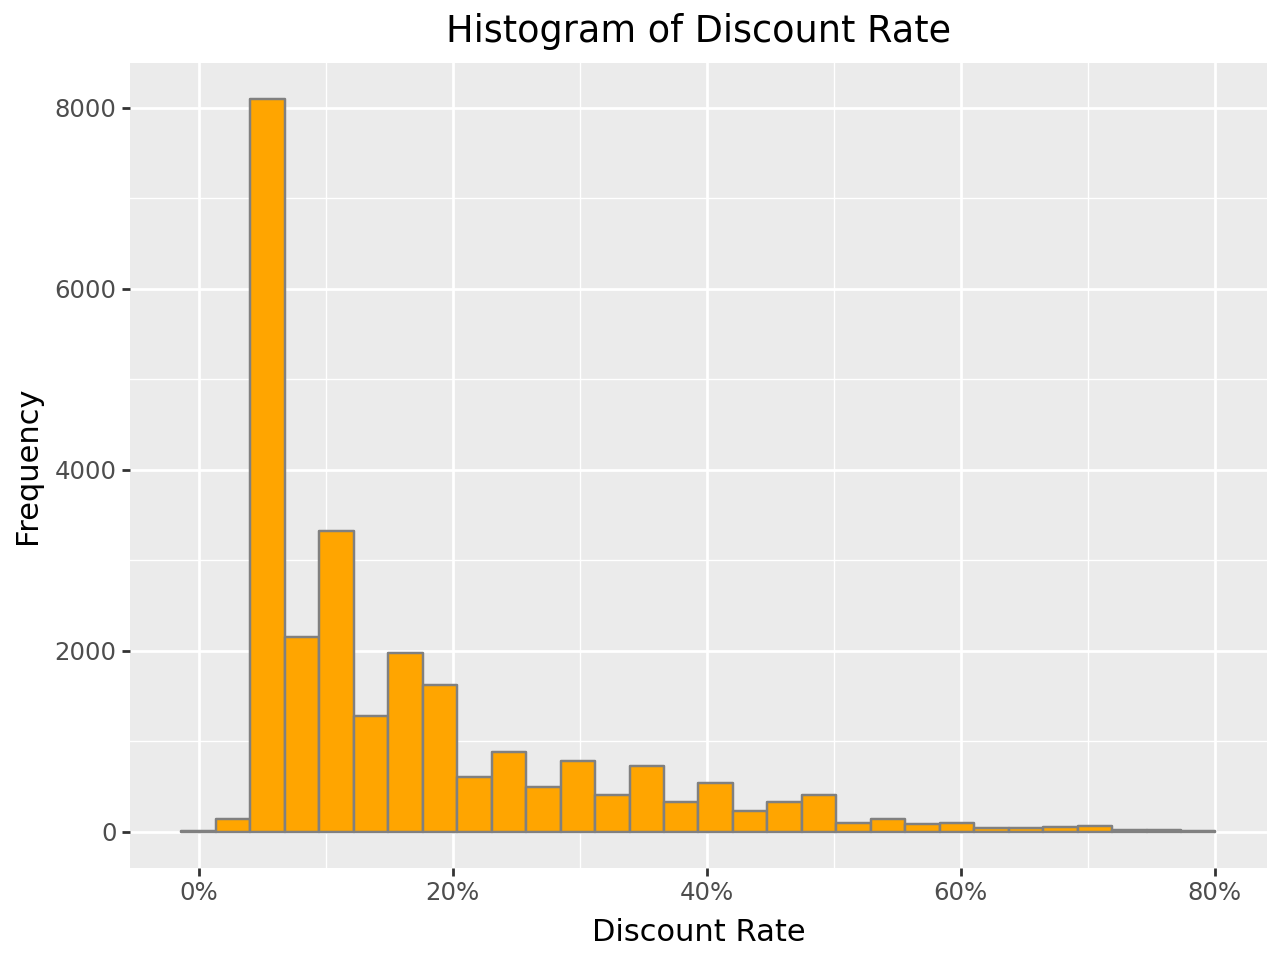

In [9]:
(ggplot(items_data.query("discount_rate>0"), aes(x="discount_rate")) +
 geom_histogram(bins=30, fill = "orange", color = "gray") +
 scale_x_continuous(labels=percent_format())+
    labs(title="Histogram of Discount Rate", x="Discount Rate", y="Frequency") +
    theme(legend_position="none"))

Los descuentos se concentran en la población de tipo gold pro, gold premium y gold special, los demás tipos, no cuentan con ninguna clase de descuento.

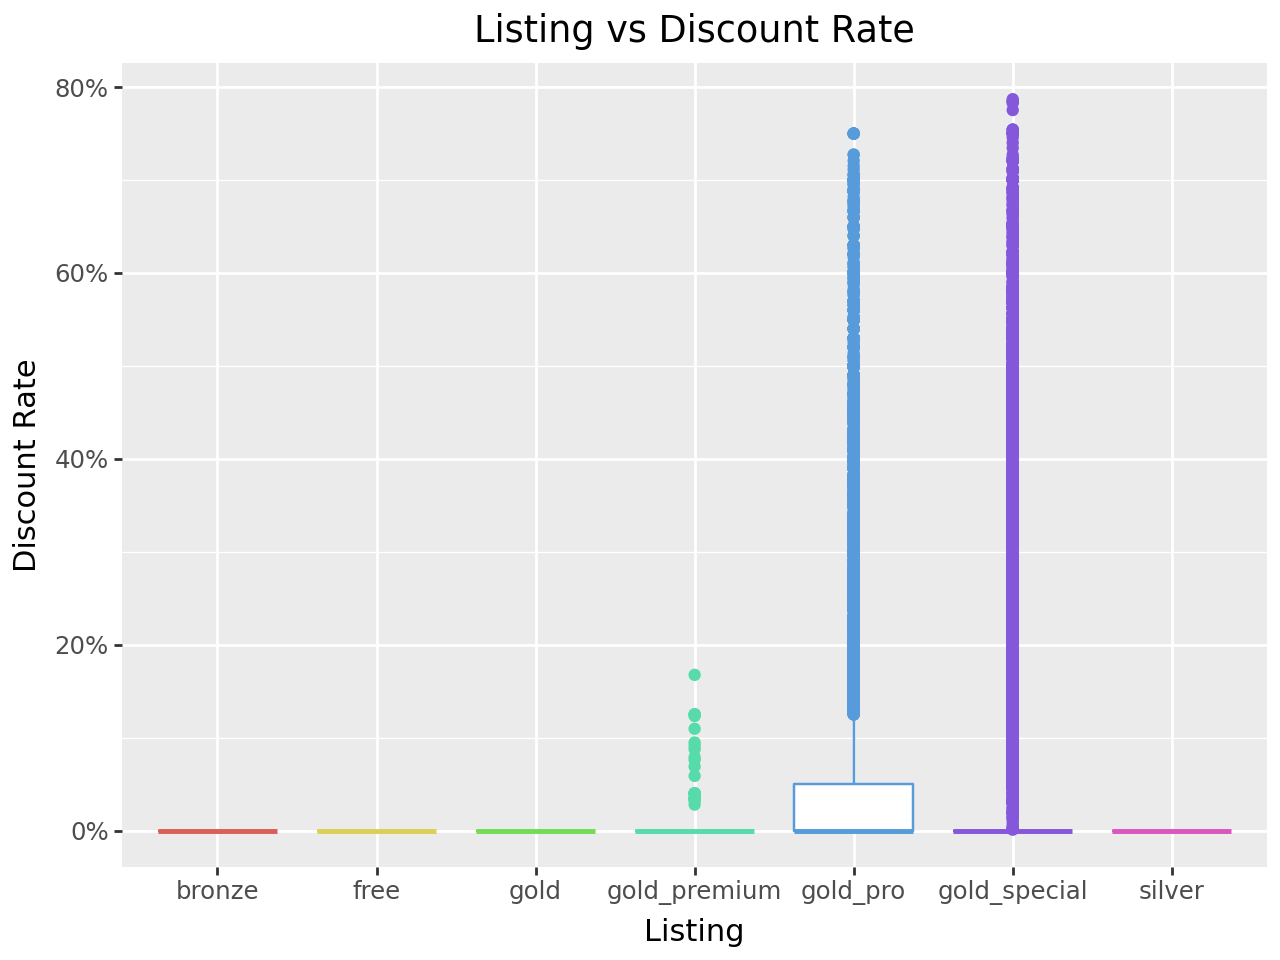

In [10]:
(ggplot(items_data, aes(x="listing_type_id", y="discount_rate", color = "listing_type_id")) +
    geom_boxplot() +
    scale_y_continuous(labels=percent_format()) +
    labs(title="Listing vs Discount Rate", x="Listing", y="Discount Rate") +
    theme(legend_position="none")
)

Dentro de las categorías se ve que los menores descuentos se concentran en gold premium, en segundo lugar gold pro y los más altos en gold special. En general la relación entre gold pro y special es bastante cercana.

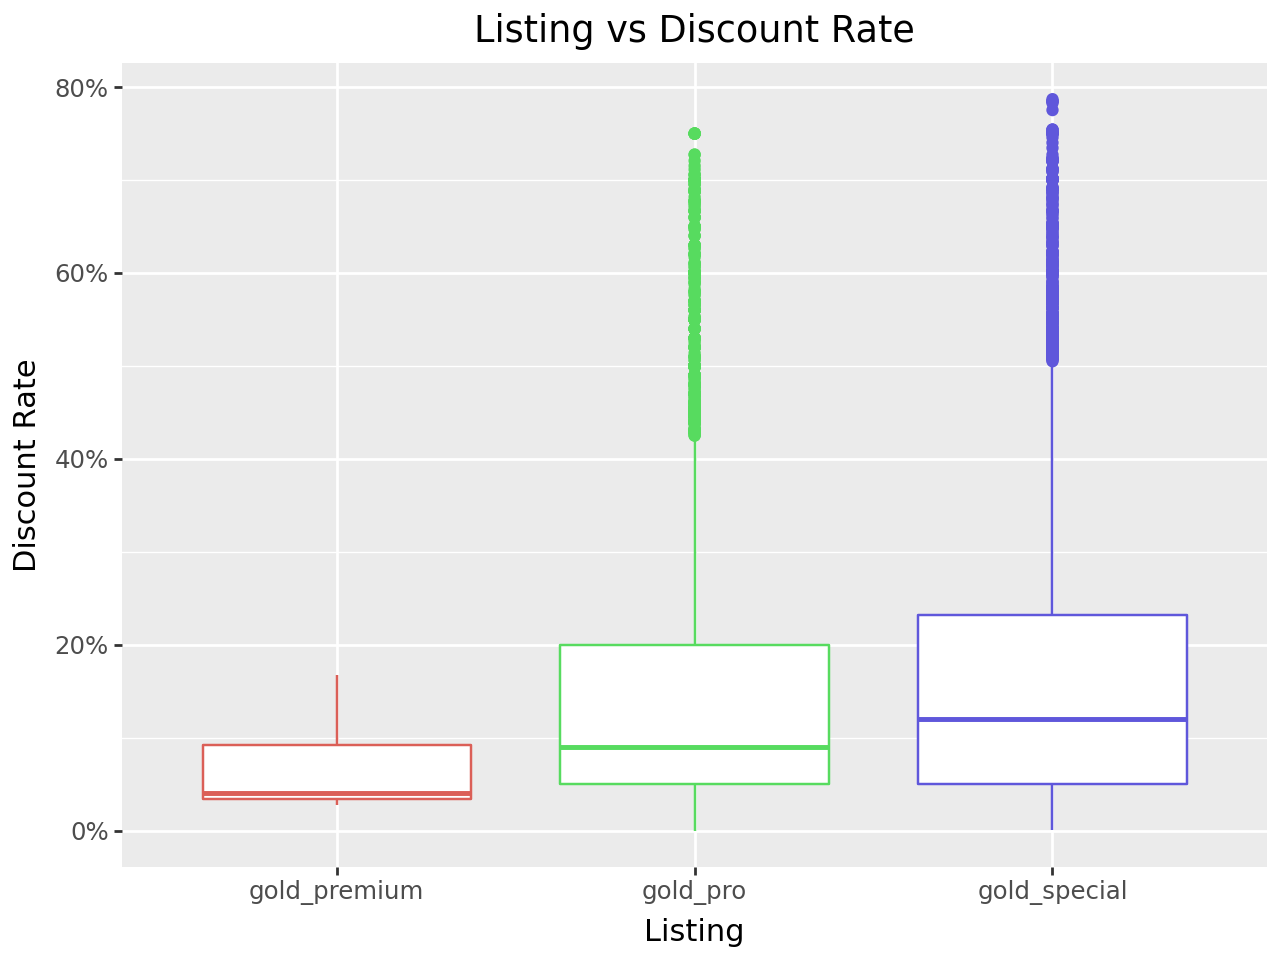

In [11]:
(ggplot(items_data.query("discount_rate>0"), aes(x="listing_type_id", y="discount_rate", color = "listing_type_id")) +
    geom_boxplot() +
    scale_y_continuous(labels=percent_format()) +

    labs(title="Listing vs Discount Rate", x="Listing", y="Discount Rate") +
    theme(legend_position="none"))

Al comparar los tipos de compra contra los descuentos, muestran que aquellos productos con tipo *buy_it_now*, presenta descuentos más altos que *classified*. 

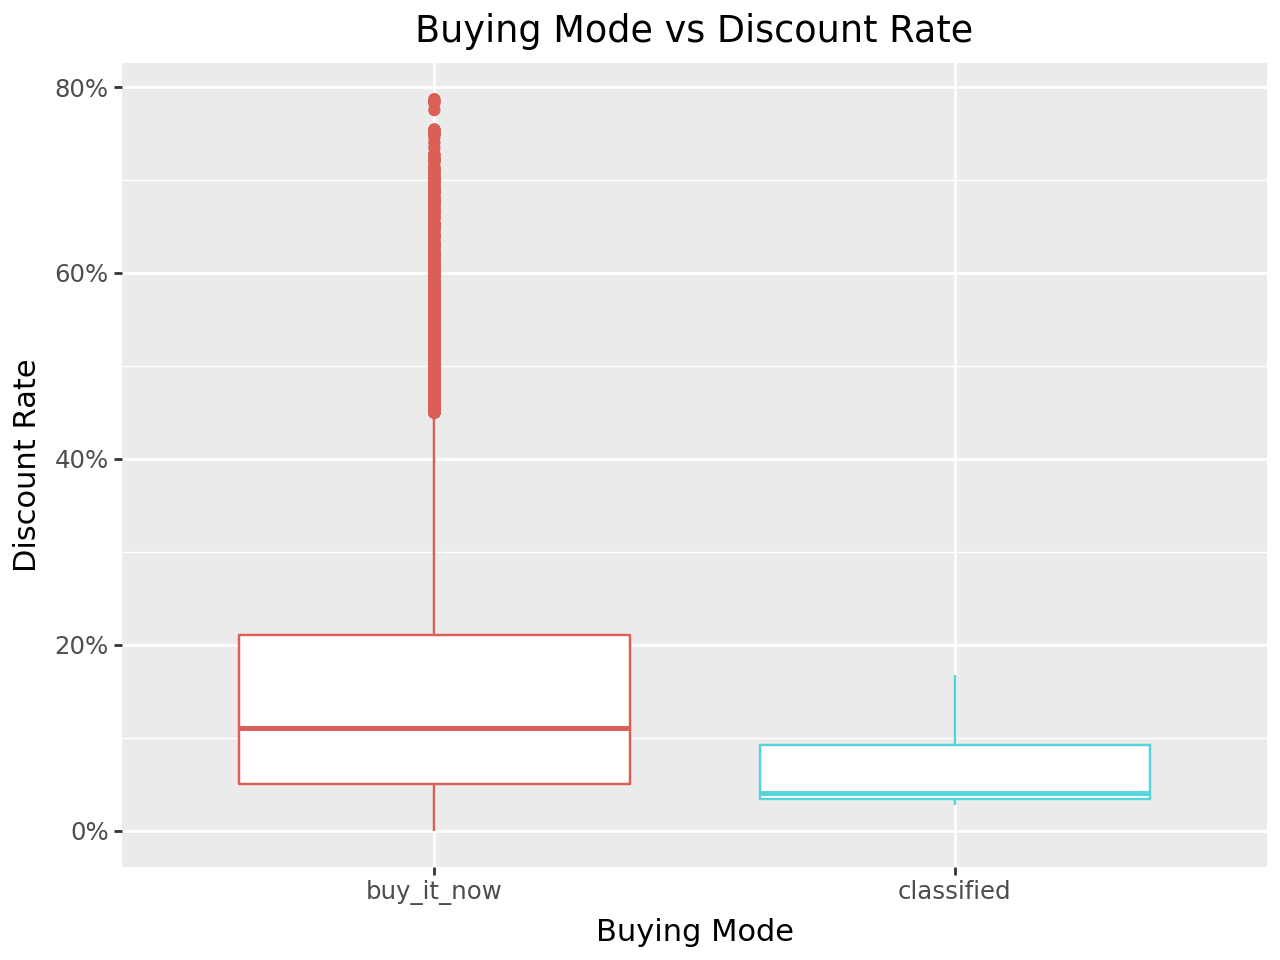

In [12]:
(ggplot(items_data.query("discount_rate>0"), aes(x="buying_mode", y="discount_rate", color = "buying_mode")) +
    geom_boxplot() +
    scale_y_continuous(labels=percent_format()) +
    labs(title="Buying Mode vs Discount Rate", x="Buying Mode", y="Discount Rate") +
    theme(legend_position="none"))

## Price

 Los precios más altos se concentran en clientes con categoría gold premium 

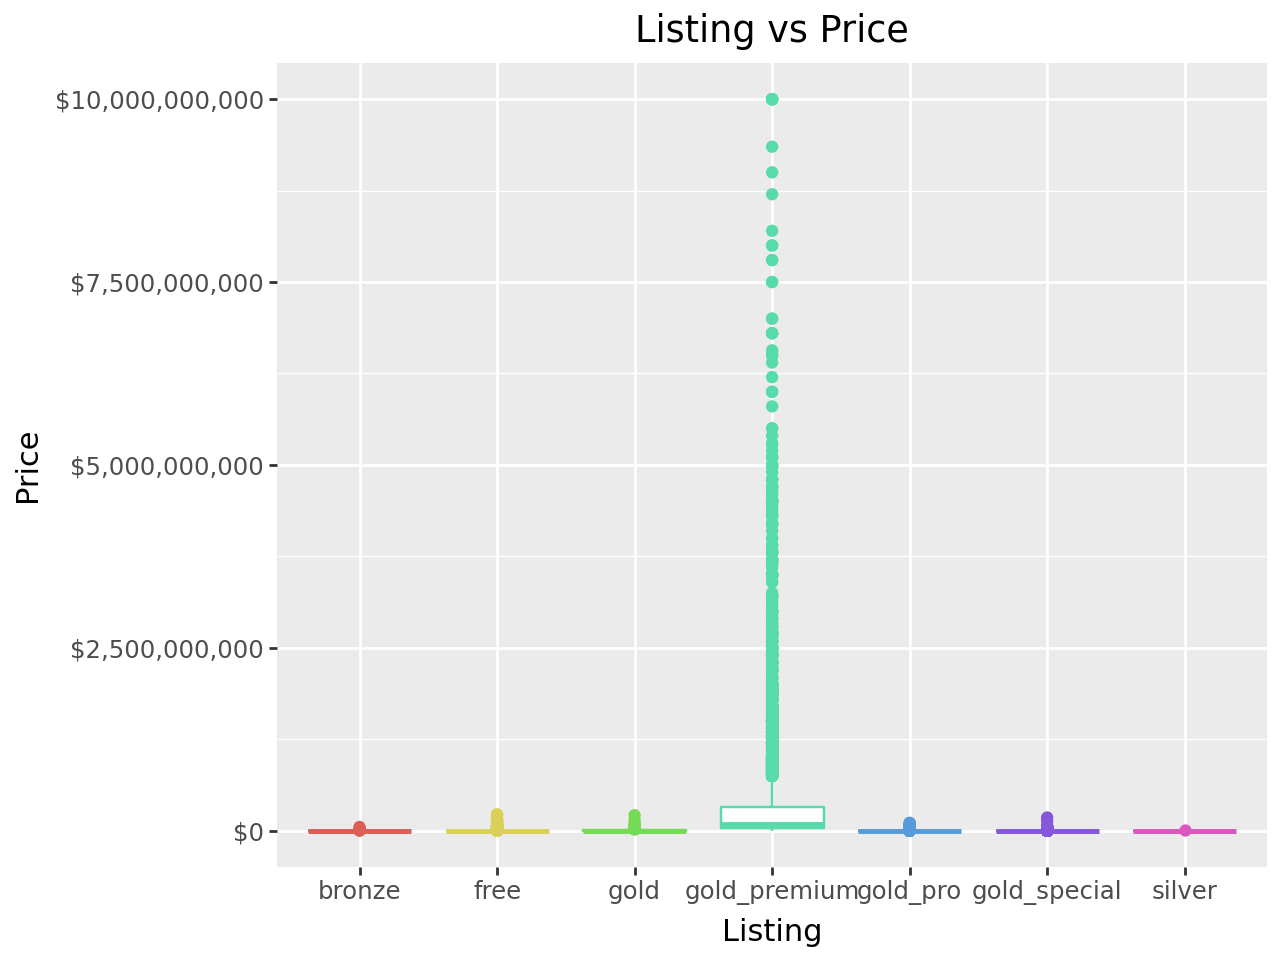

In [13]:
(ggplot(items_data, aes(x="listing_type_id", y="price", color = "listing_type_id")) +
    geom_boxplot() +
    scale_y_continuous(labels=currency_format(big_mark=',', precision=0)) +
    labs(title="Listing vs Price", x="Listing", y="Price") +
    theme(legend_position="none"))

Al indagar sobre las razones, encontramos que puede ser debido a que se ven movidos los resultados por las categorías de productos *"Inmuebles"*, *"Carros, Motos y Otros"* y *"Servicios"*

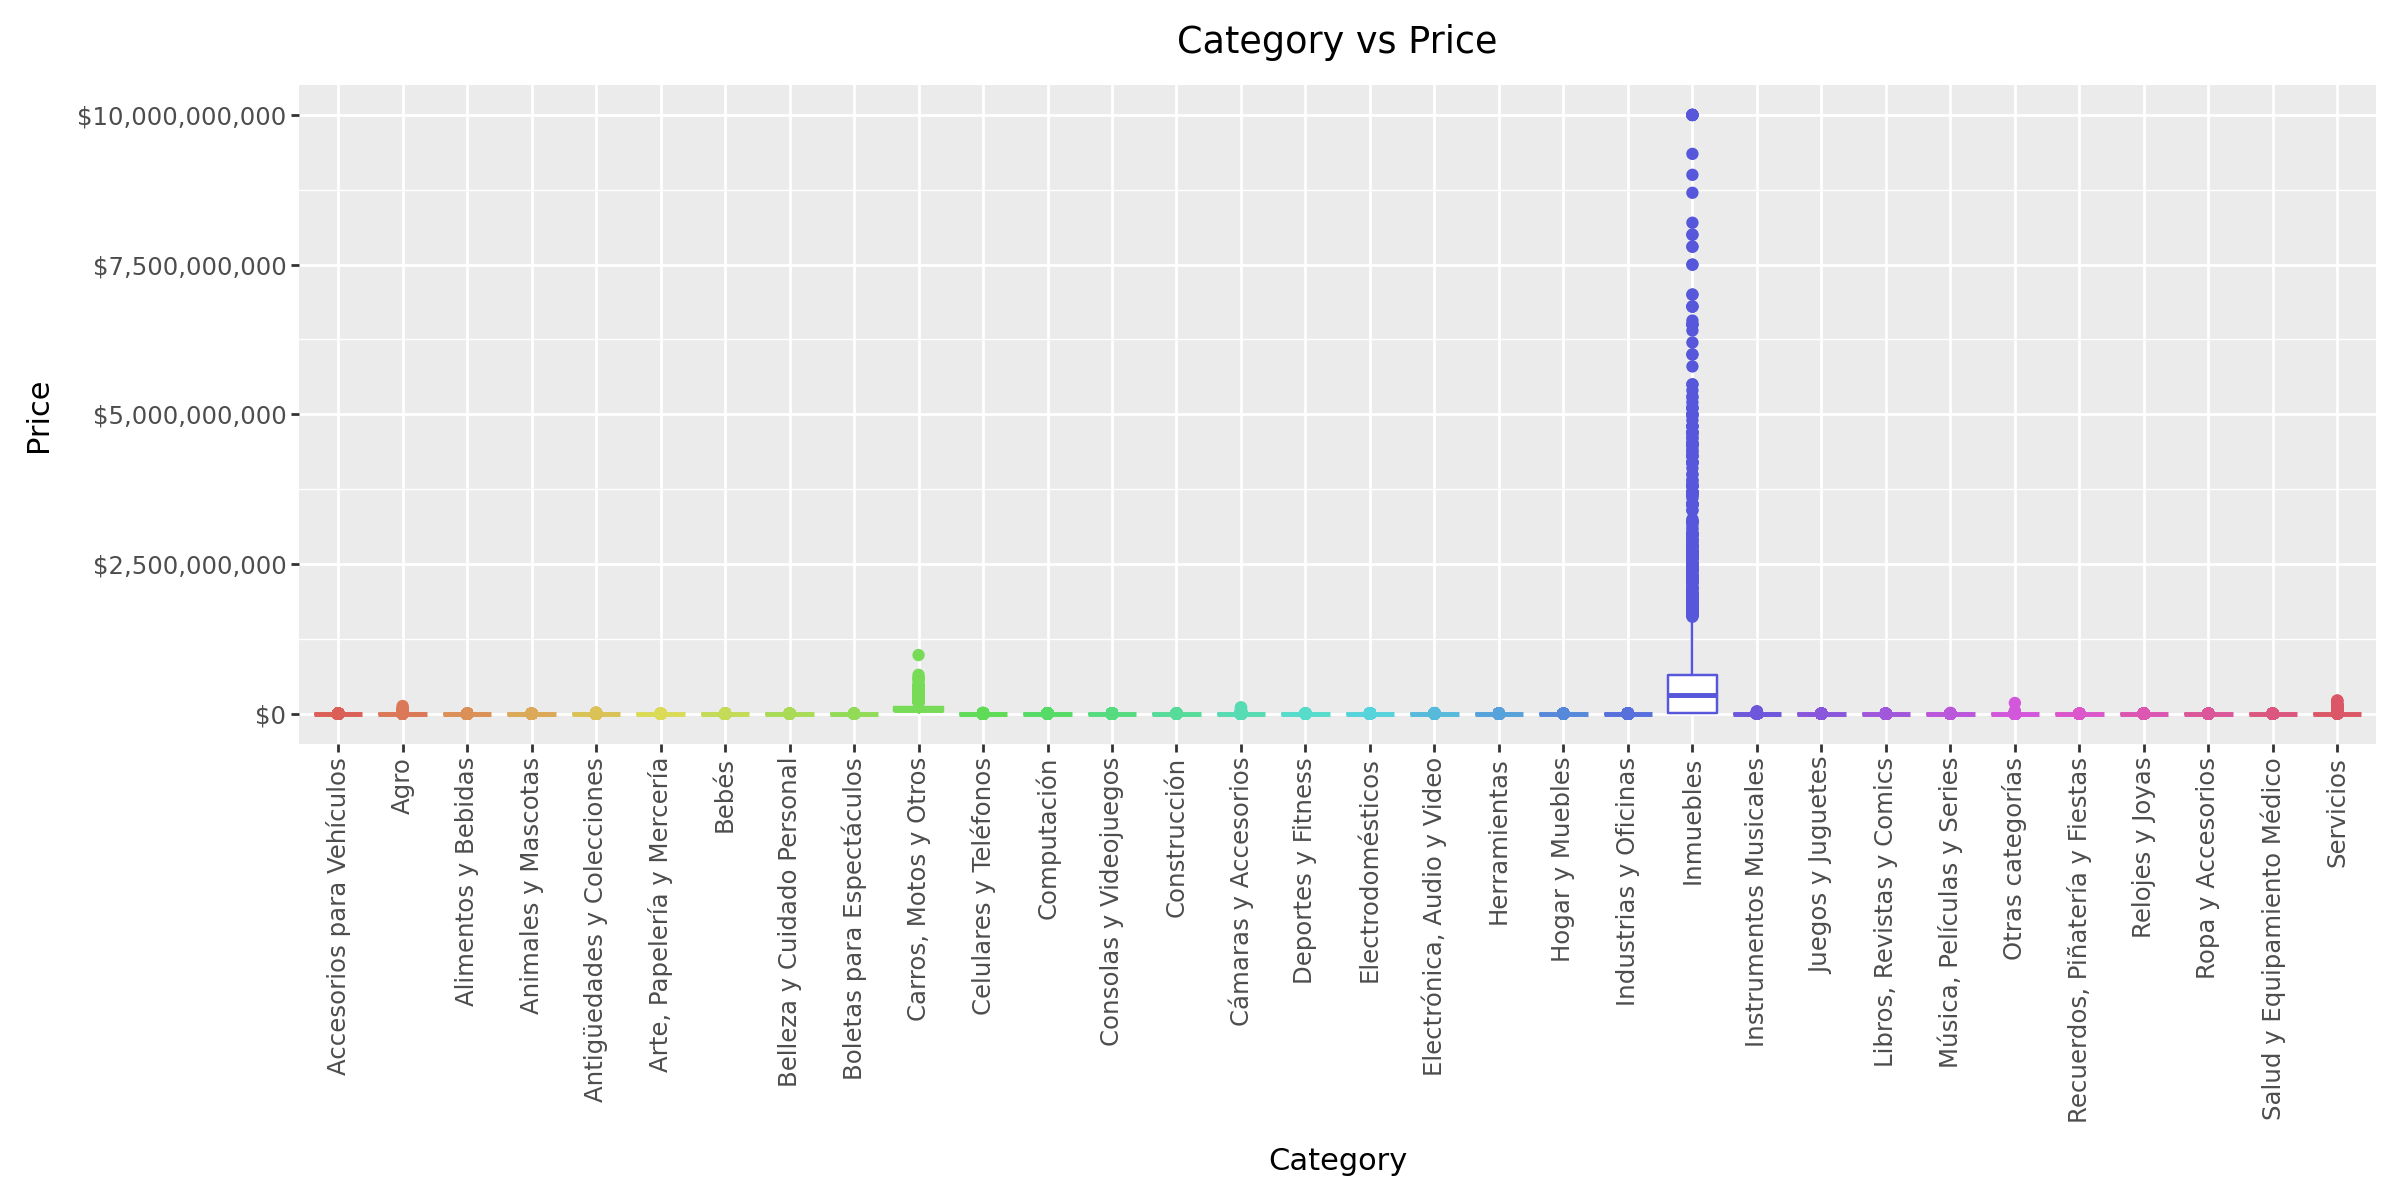

In [14]:
# do a boxplot of the price vs category, flip labels to avoid overlap
(ggplot(items_data, aes(x="category_name", y="price", color = "category_name")) +
    geom_boxplot() +
    scale_y_continuous(labels=currency_format(big_mark=',', precision=0)) +
    labs(title="Category vs Price", x="Category", y="Price") +
    theme(legend_position="none") +
    theme(axis_text_x=element_text(angle=90), figure_size=(12, 6))
)

Aquí podemos ver un gran cambio en la escala del comportamiento de acuerdo a los listings  sin embargo, esta variable no nos explica toda la diferencia en los precios.

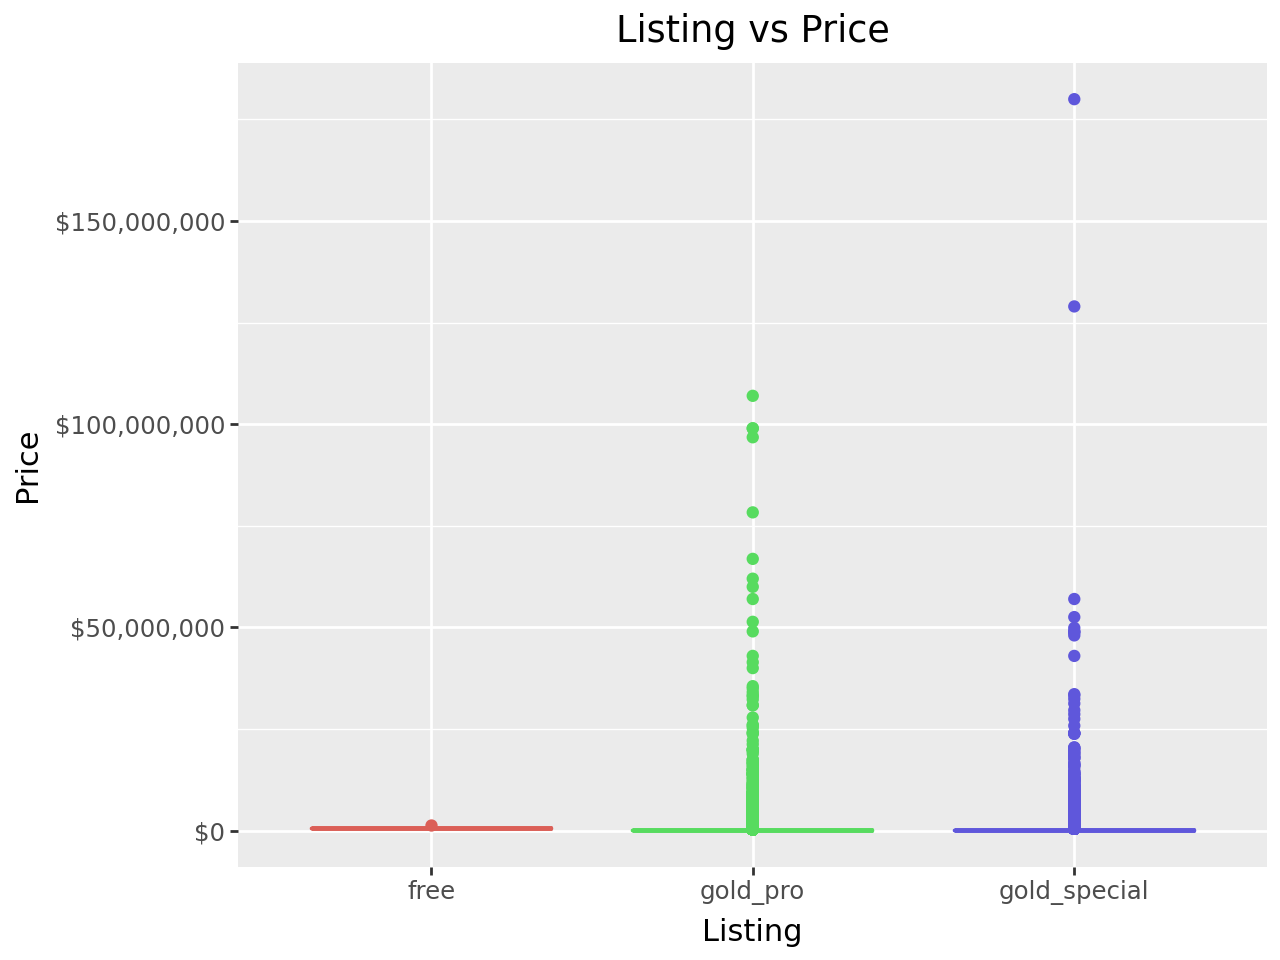

In [15]:
cats_remove = ["Inmuebles", "Carros, Motos y Otros", "Servicios"]
(ggplot(items_data.query("category_name not in @cats_remove"), aes(x="listing_type_id", y="price", color = "listing_type_id")) +
    geom_boxplot() +
    scale_y_continuous(labels=currency_format(big_mark=',', precision=0)) +
    labs(title="Listing vs Price", x="Listing", y="Price") +
    theme(legend_position="none"))

## Category

Ahora, si revisamos la distribución de la tasa de descuento por categoría, tenemos que para los productos que tienen descuentos, hay algunos casos en los que el descuento es mínimo, como por ejemplo 'Boletas para Espectáculos' y 'Carros, Motos y Otros', aunque este último puede ser debido al precio de los productos de esta categoría, por lo cuál no serían capaces de ofrecer descuentos tan amplios. En otros casos, como 'Bebés', 'Industrias y Oficinas' y 'Relojes y Joyas', tenemos una distribución más alta de tasas de descuento para sus productos.

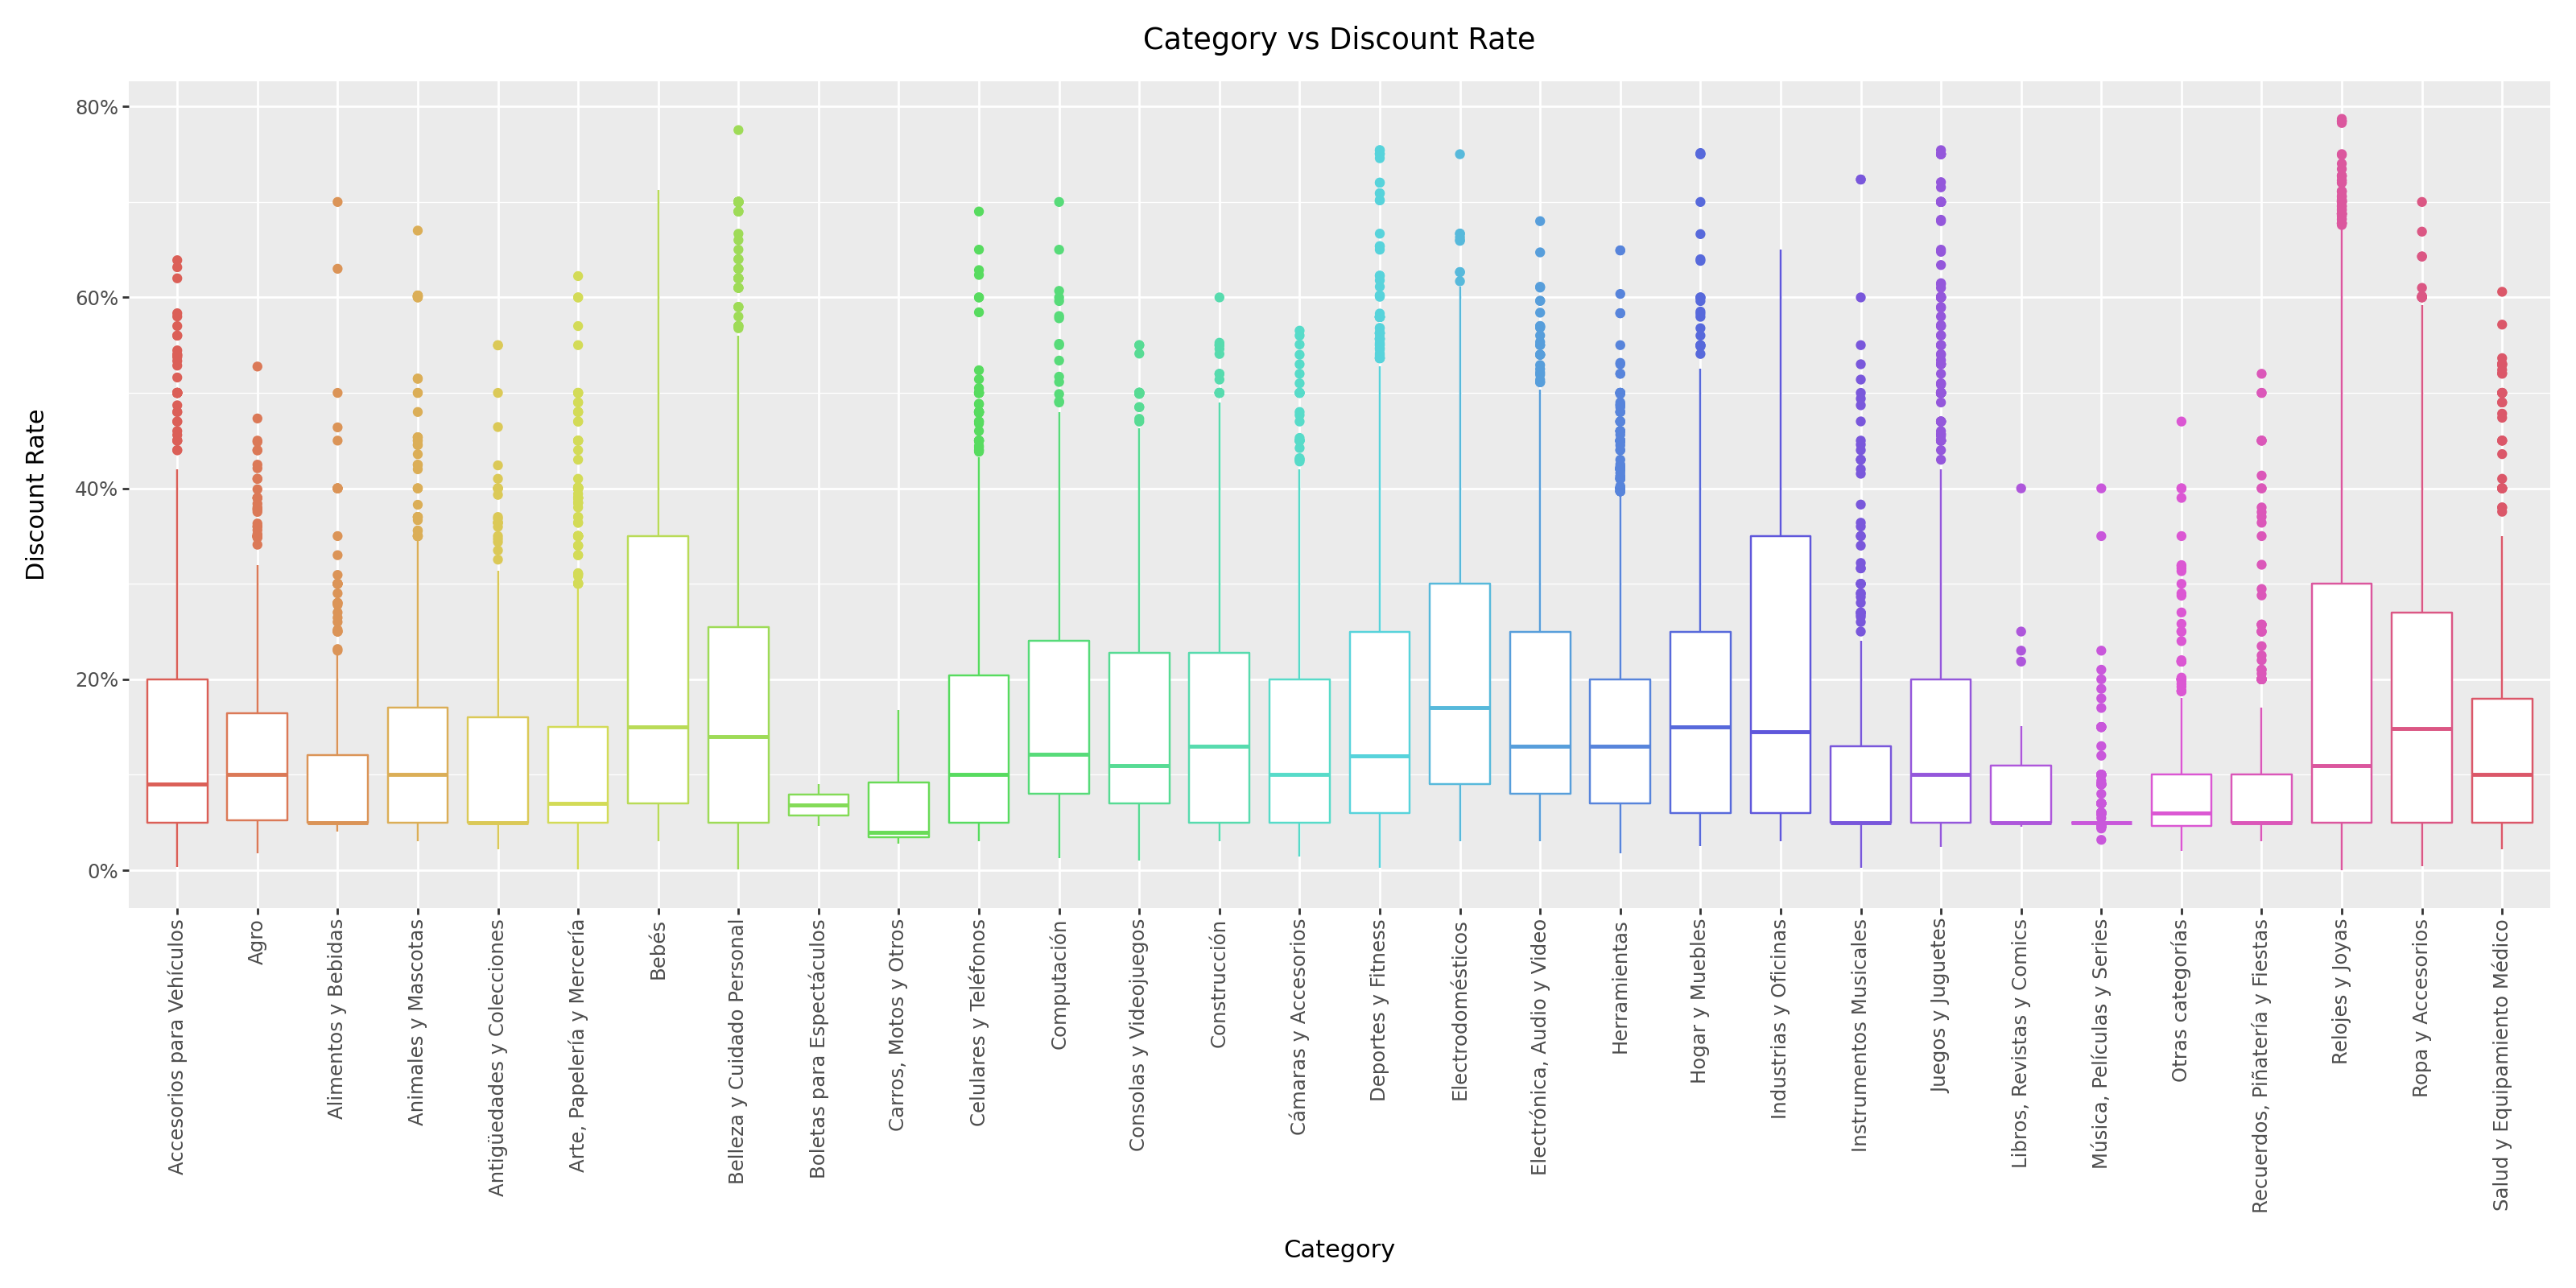

In [16]:
(ggplot(items_data.query("discount_rate>0"), aes(x="category_name", y="discount_rate", color = "category_name")) +
    geom_boxplot() +
    scale_y_continuous(labels=percent_format()) +
    labs(title="Category vs Discount Rate", x="Category", y="Discount Rate") +
    theme(legend_position="none") +
    theme(axis_text_x=element_text(angle=90), figure_size=(16, 8)) 
)

Al revisar los precios por categoría divididos en aquellos que tienen o no descuento (para un precio menor a $10,000,000), vemos como *"Inmuebles"*, *"Carros, Motos y Otros"* y *"Servicios"* no cuentan con precios apra el caso de con descuento, lo cuál nos da a entender que estas categorías no han tenido hasta ahora un producto con descuento o al menos no muchos.

De manera general, los descuentos parecen ser aplicados a productos con precios más bajos respecto a los que no tienen ninguna clase de descuento.

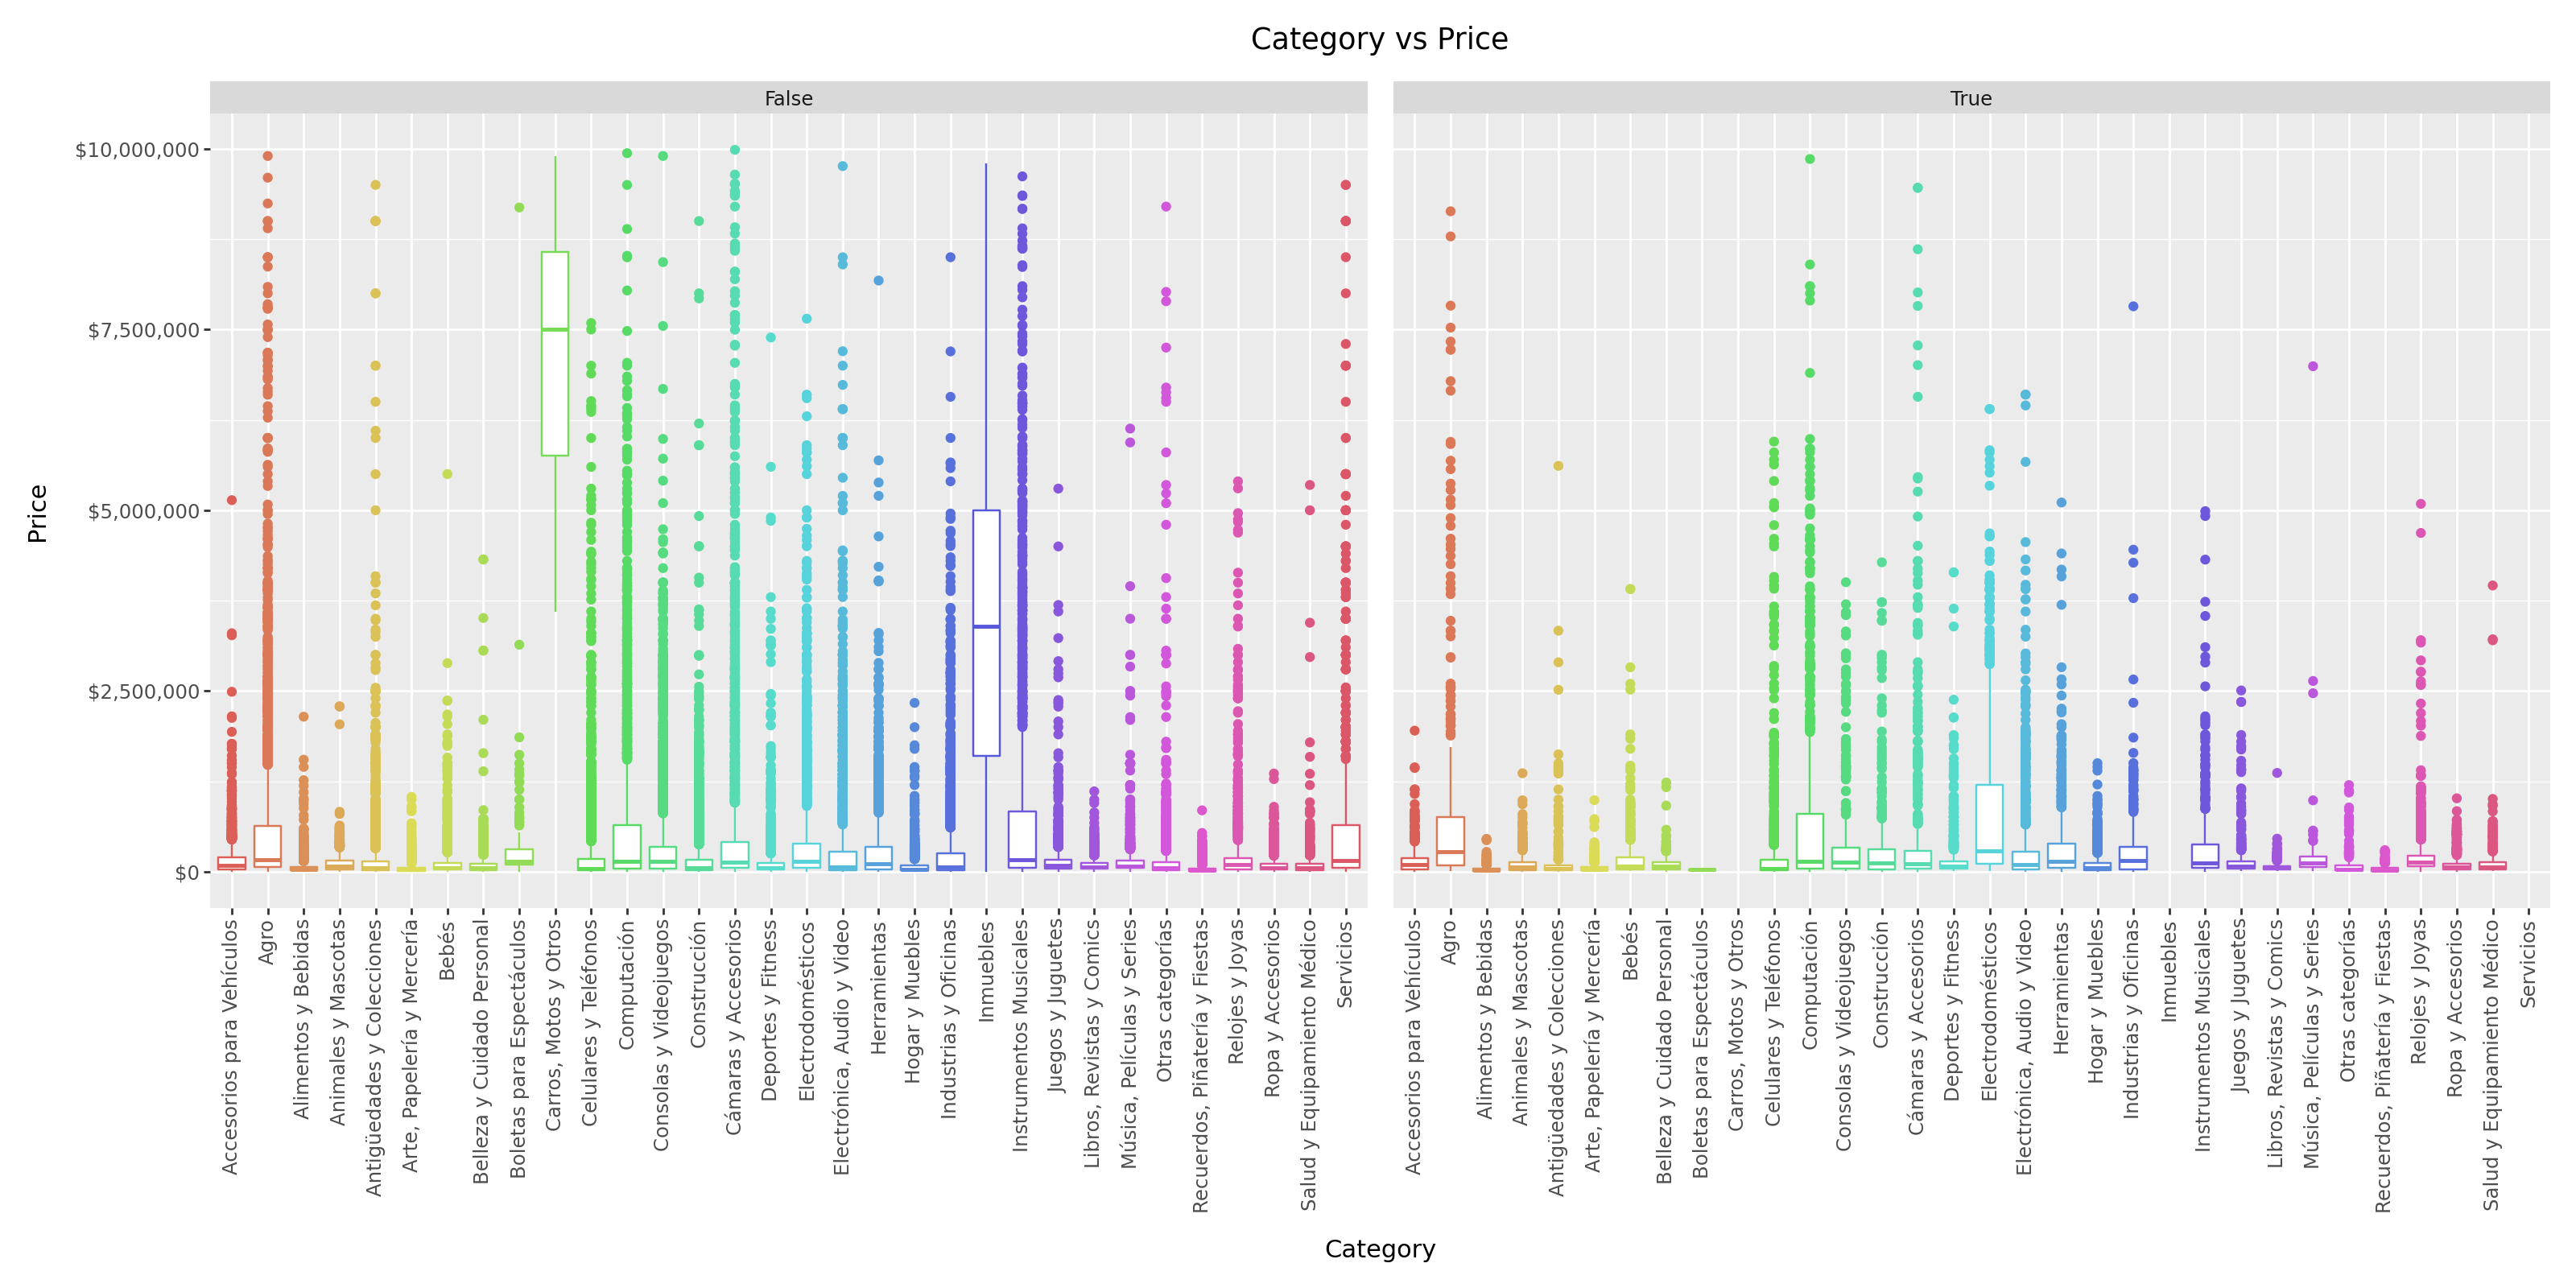

In [31]:
(ggplot(items_data.query("price<10000000"), aes(x="category_name", y="price", color = "category_name")) +
    geom_boxplot() +
    scale_y_continuous(labels=currency_format(big_mark=',', precision=0)) +
    labs(title="Category vs Price", x="Category", y="Price") +
    theme(legend_position="none") +
    theme(axis_text_x=element_text(angle=90), figure_size=(16, 8)) +
    facet_wrap("~has_discount") 
)

Sin embargo, al revisarlo con más detalle, esto puede ser un tema de percepción debido a los outliers de las diferentes categorías.

In [53]:
media_descuento = items_data.groupby(["category_name", "has_discount"]).price.mean().unstack(-1)
media_descuento["Es mayor con descuento"] = media_descuento[True] > media_descuento[False]
media_descuento["Es mayor con descuento"].value_counts()

Es mayor con descuento
False    16
True     16
Name: count, dtype: int64

In [48]:
media_descuento.drop(columns = "Es mayor con descuento").style.format(lambda x: f'${x/1000:.1f}K')

has_discount,False,True
category_name,,
Accesorios para Vehículos,$163.8K,$155.2K
Agro,$1018.6K,$1282.5K
Alimentos y Bebidas,$63.0K,$37.8K
Animales y Mascotas,$113.3K,$106.2K
Antigüedades y Colecciones,$229.5K,$136.6K
"Arte, Papelería y Mercería",$54.1K,$53.2K
Bebés,$129.4K,$181.7K
Belleza y Cuidado Personal,$92.0K,$96.3K
Boletas para Espectáculos,$284.3K,$28.4K


Finalmente, al contrastar con la posibilidad de que un item acepte Mercadopago, encontramos que se encuentra bastante relacionado con la existencia o no de un descuento, ya que justamente son las categorías de *"Inmuebles"*, *"Carros, Motos y Otros"* y *"Servicios"* las que no cuentan con posibilidad de usar Mercadopago, y son estas mismas las que se vio que no cuentan con descuentos.

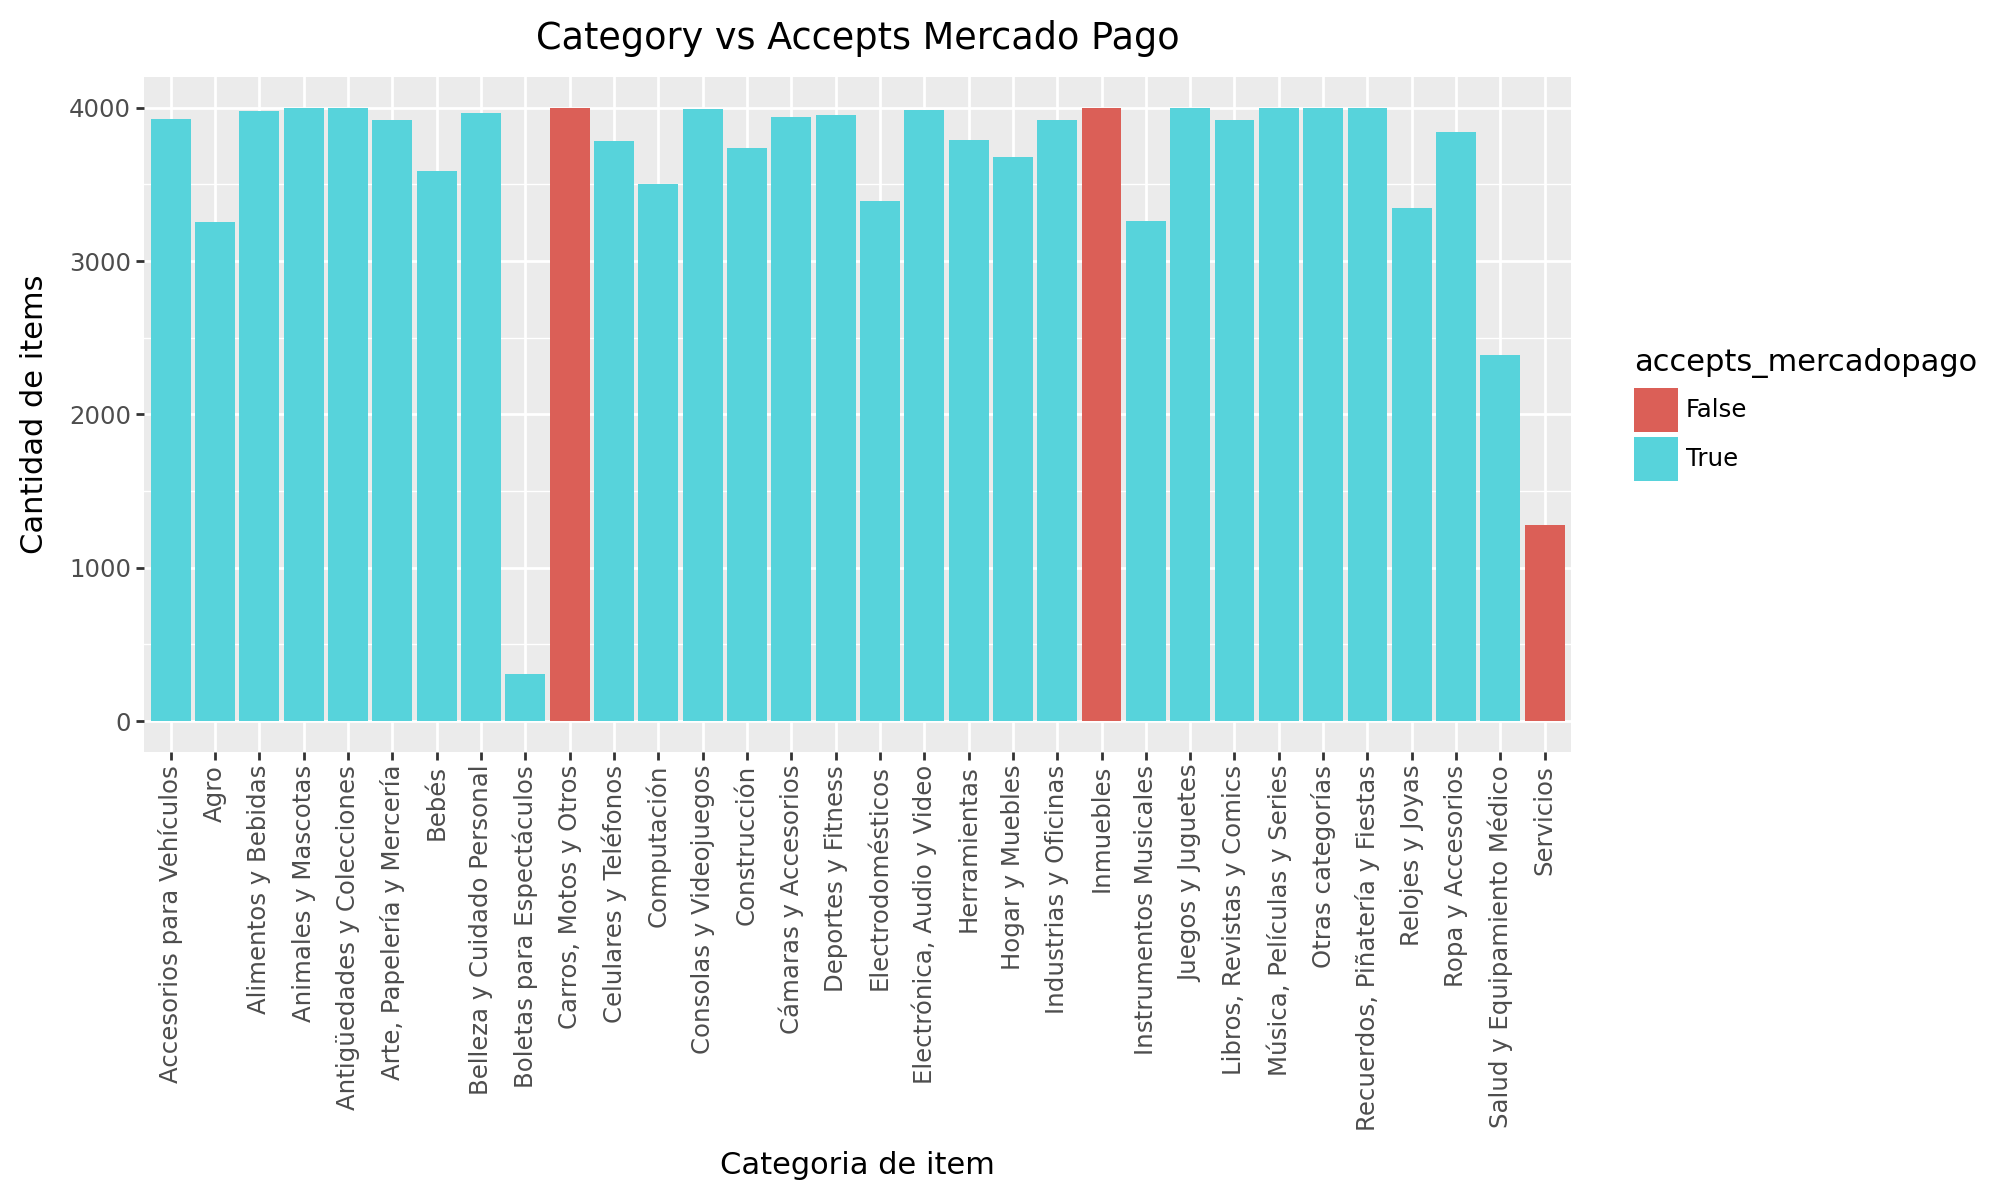

In [19]:
(ggplot(items_data, aes(x="category_name", fill="accepts_mercadopago")) +
    geom_bar() +
    labs(title="Category vs Accepts Mercado Pago", x="Categoria de item", y="Cantidad de items") +
    theme(axis_text_x=element_text(angle=90), figure_size=(10, 6)) 
)

## Condition

En general, los descuentos se encuentran concentrados en productos que son nuevos, lo cuál es mucho menor para el caso de los usados.

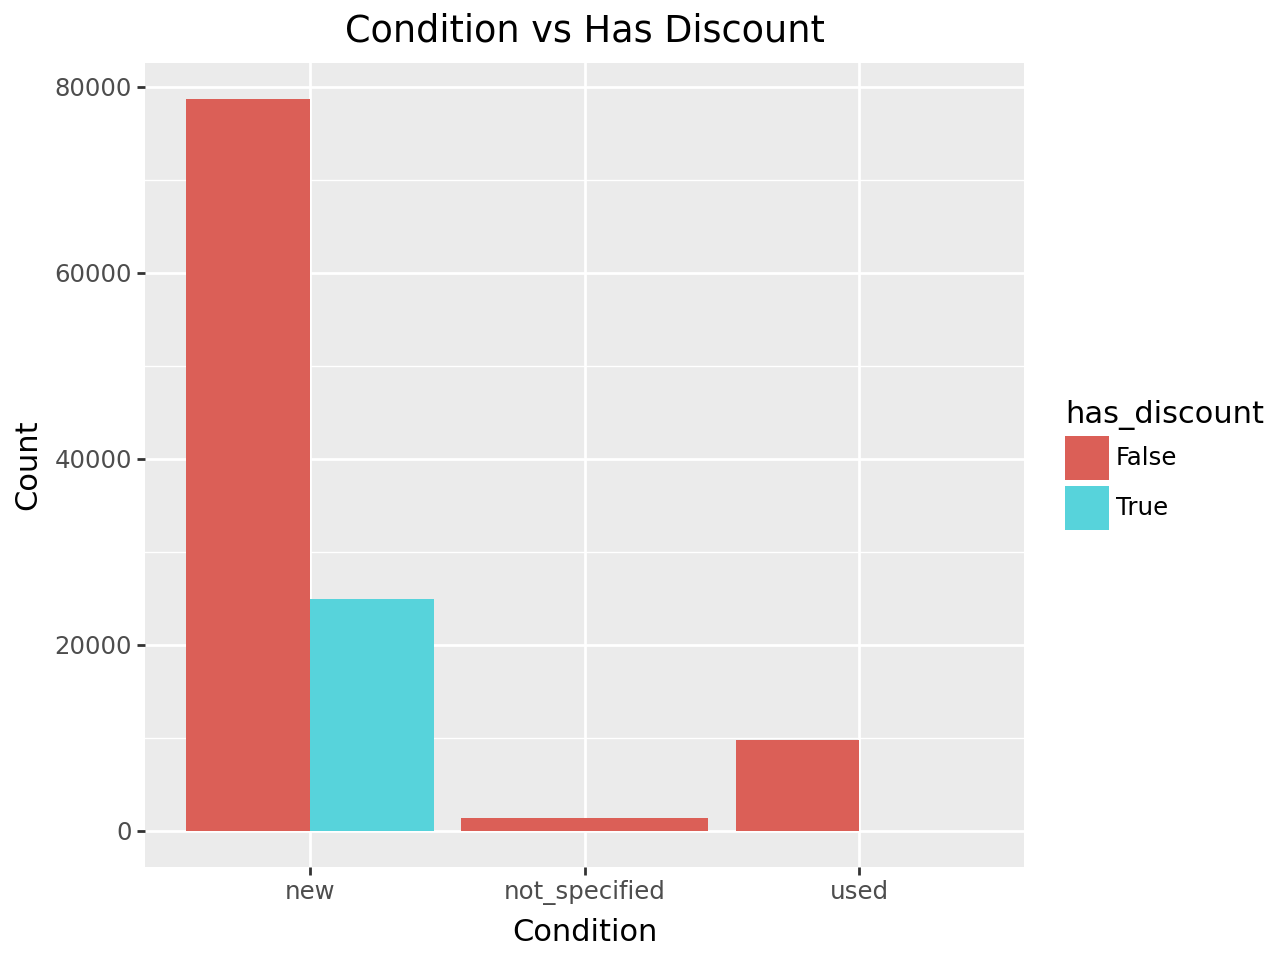

In [66]:
(ggplot(items_data, aes(x="condition", fill="has_discount")) +
    geom_bar(position="dodge") +
    labs(title="Condition vs Has Discount", x="Condition", y="Count")
)

De igual manera, al revisar la tasa de descuento en función de esa condición, justamente vemos que para los nuevos, la distribución es bastante amplía, mientras que para los usados es mucho menor.

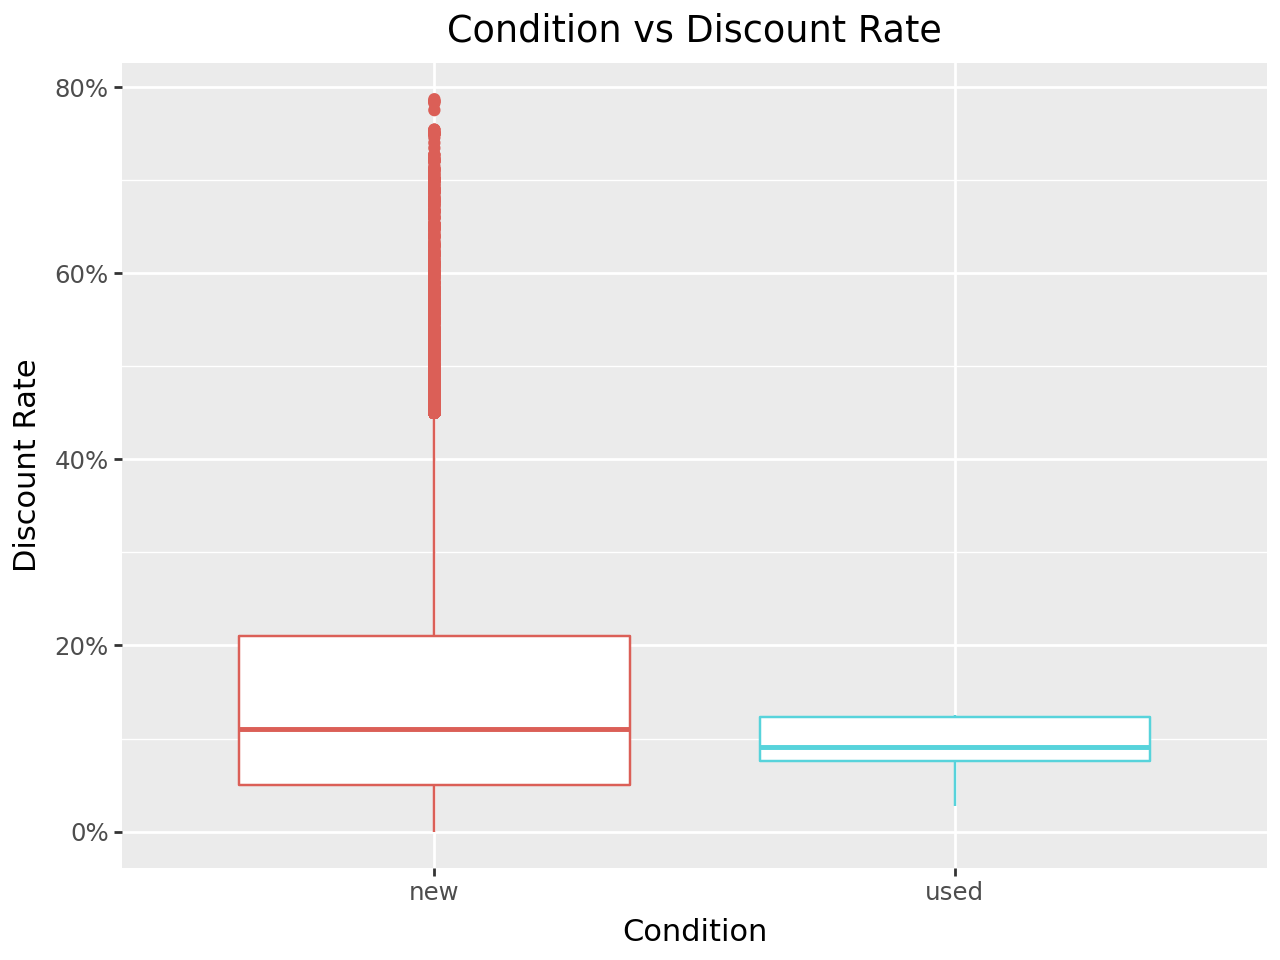

In [21]:
(ggplot(items_data.query("discount_rate>0"), aes(x="condition", y="discount_rate", color = "condition")) +
    geom_boxplot() +
    scale_y_continuous(labels = percent_format())+
    labs(title="Condition vs Discount Rate", x="Condition", y="Discount Rate") +
    theme(legend_position="none")
)

Es importante resaltar, que para el caso de los descuentos de usados, se encuentra también que este es el comportamiento de solo 13 items y que todos corresponden a la categoría de *"Carros, motos y otros"*

In [22]:
items_data.query("discount_rate>0 & condition == 'used'").groupby(["category_name", "has_discount"]).size()

category_name          has_discount
Carros, Motos y Otros  True            13
dtype: int64

## Shipping

Actualmente tenemos 7 categorías en específico de logística disponible en Mercadolibre, siendo las más importantes: xd_drop_off (envios a través de los puntos autorizados de ML), cross_docking (envíos recogidos en puerta a los vendedores por parte de ML) y fulfillment (productos despachados directamente desde los centros de distribución de ML).

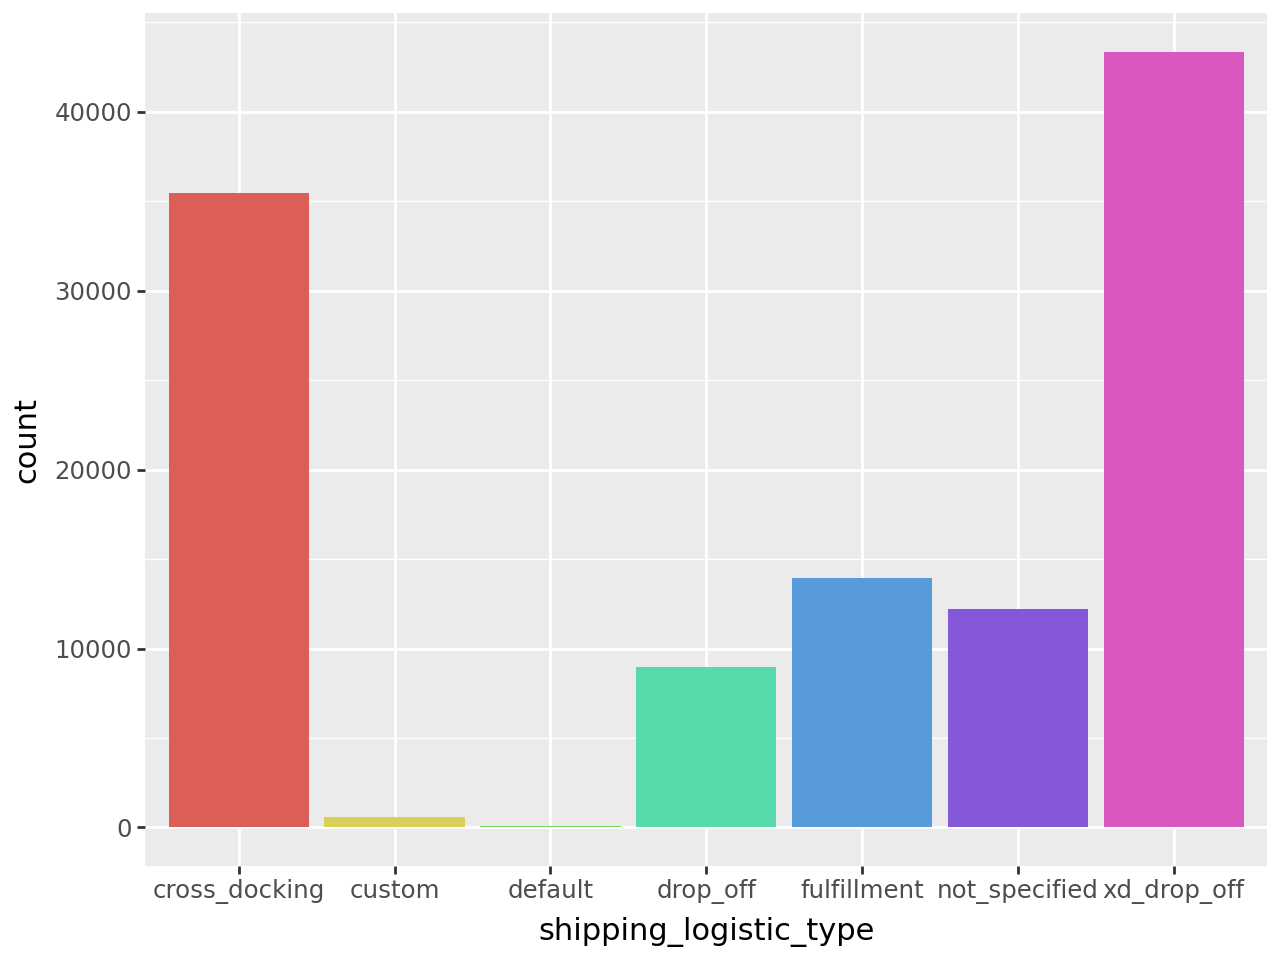

In [25]:
# do a bar plot for shipping logistic type
(ggplot(items_data, aes(x="shipping_logistic_type", fill = "shipping_logistic_type")) +
    geom_bar(position="dodge")+
    theme(legend_position="none")
)

En el caso de la posibilidad de tener o no envío gratis, tenemos que el tener o no un descuento, se comporta de manera similar entre aquellos items con y sin envio gratis.

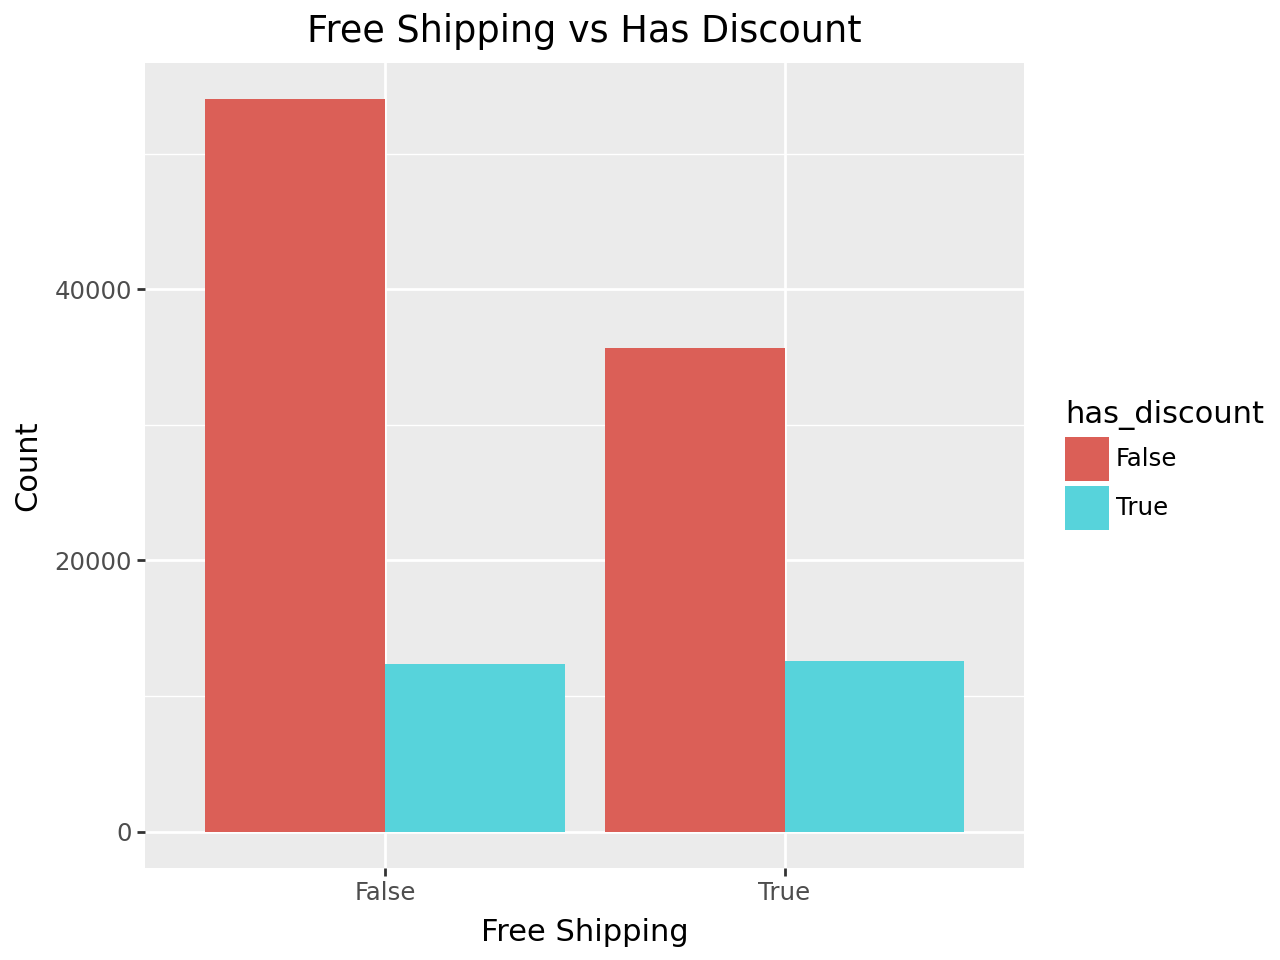

In [23]:
(ggplot(items_data, aes(x="shipping_free_shipping", fill="has_discount")) +
    geom_bar(position="dodge") +
    labs(title="Free Shipping vs Has Discount", x="Free Shipping", y="Count")
)

En términos de proporción, la proporción más alta de descuentos la encontramos en la categoría de default, seguida de fulfillment y drop_off.

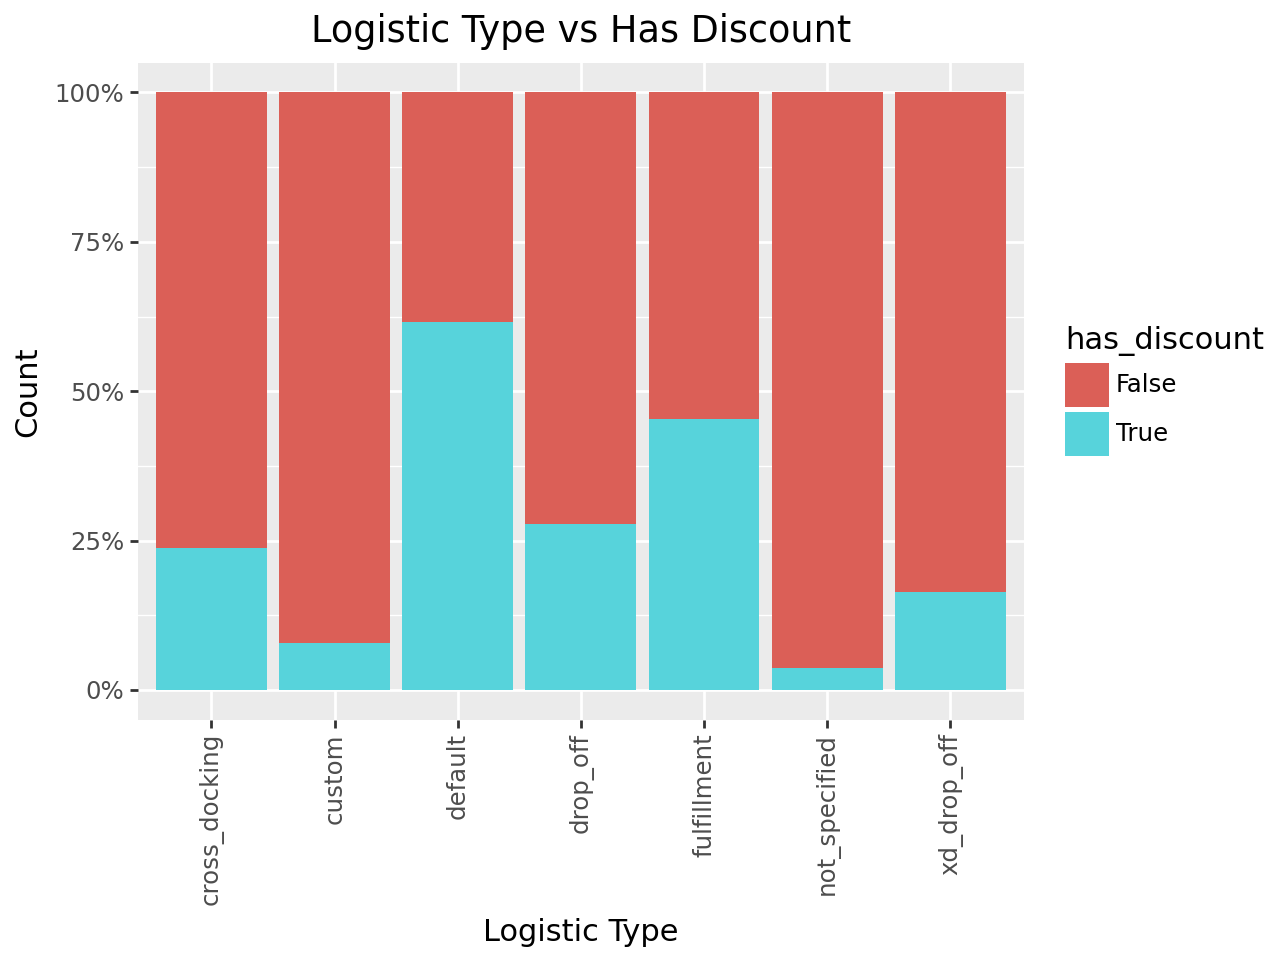

In [26]:
(ggplot(items_data, aes(x="shipping_logistic_type", fill="has_discount")) +
    geom_bar(position="fill") +
    scale_y_continuous(labels = percent_format())+
    labs(title="Logistic Type vs Has Discount", x="Logistic Type", y="Count") +
    theme(axis_text_x=element_text(angle=90))
)


Pero en el caso de default, esta relación puede no ser tan significativa ya que cuenta con muy pocos items.

In [69]:
items_data[items_data.shipping_logistic_type=='default'].groupby("category_name").size()

category_name
Agro                           1
Antigüedades y Colecciones     1
Construcción                  21
Cámaras y Accesorios           8
Deportes y Fitness             2
Electrodomésticos             16
Electrónica, Audio y Video     2
Hogar y Muebles                8
Industrias y Oficinas         22
Otras categorías               1
Ropa y Accesorios              4
dtype: int64

Retirando el comportamiento de la categoría de default, tenemos que en general para drop_off y fulfillment, tenemos comportamientos que tienen a ser similares respecto a su tasa de descuento, mientras que para crross_docking y xd_drop_off, estos son un poco inferiores en promedio. Para not specified, se ve que se encuentra distribuido de una manera más uniforme el rango de tasas de descuento.

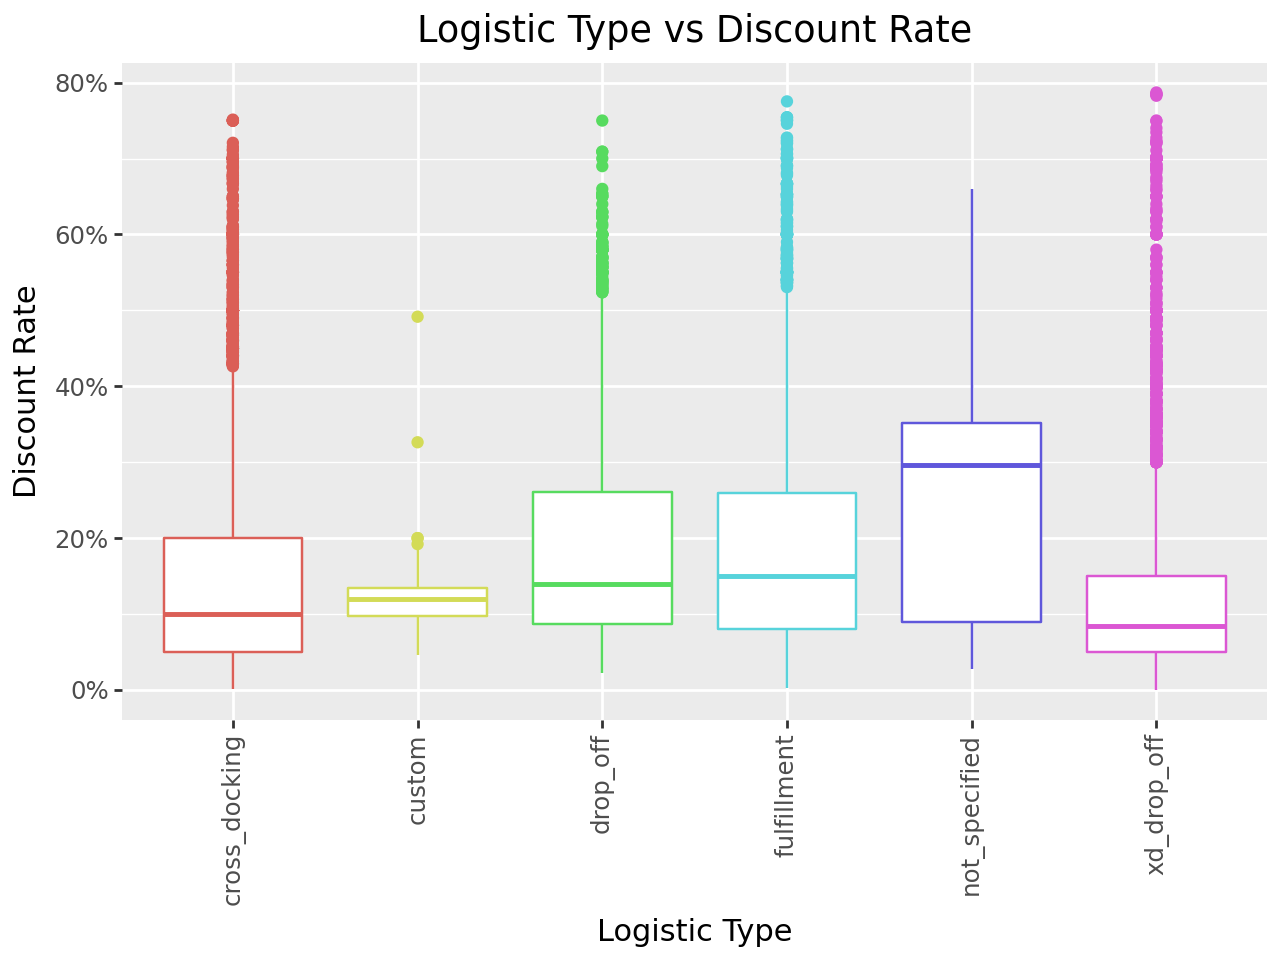

In [70]:
(ggplot(items_data.query("(discount_rate>0) & (shipping_logistic_type != 'default')"), aes(x="shipping_logistic_type", y="discount_rate", color = "shipping_logistic_type")) +
    geom_boxplot() +
    scale_y_continuous(labels = percent_format())+
    labs(title="Logistic Type vs Discount Rate", x="Logistic Type", y="Discount Rate") +
    theme(legend_position="none") +
    theme(axis_text_x=element_text(angle=90))
)

## Seller

Respecto al conteo de items con descuento según el estatus de su seller, vemos diferencias considerables entre los seller platinum y los demás tipos. Para gold, silver y desconocidos el comportamiento absoluto es similar, pero en términos relativos puede diferir un poco.

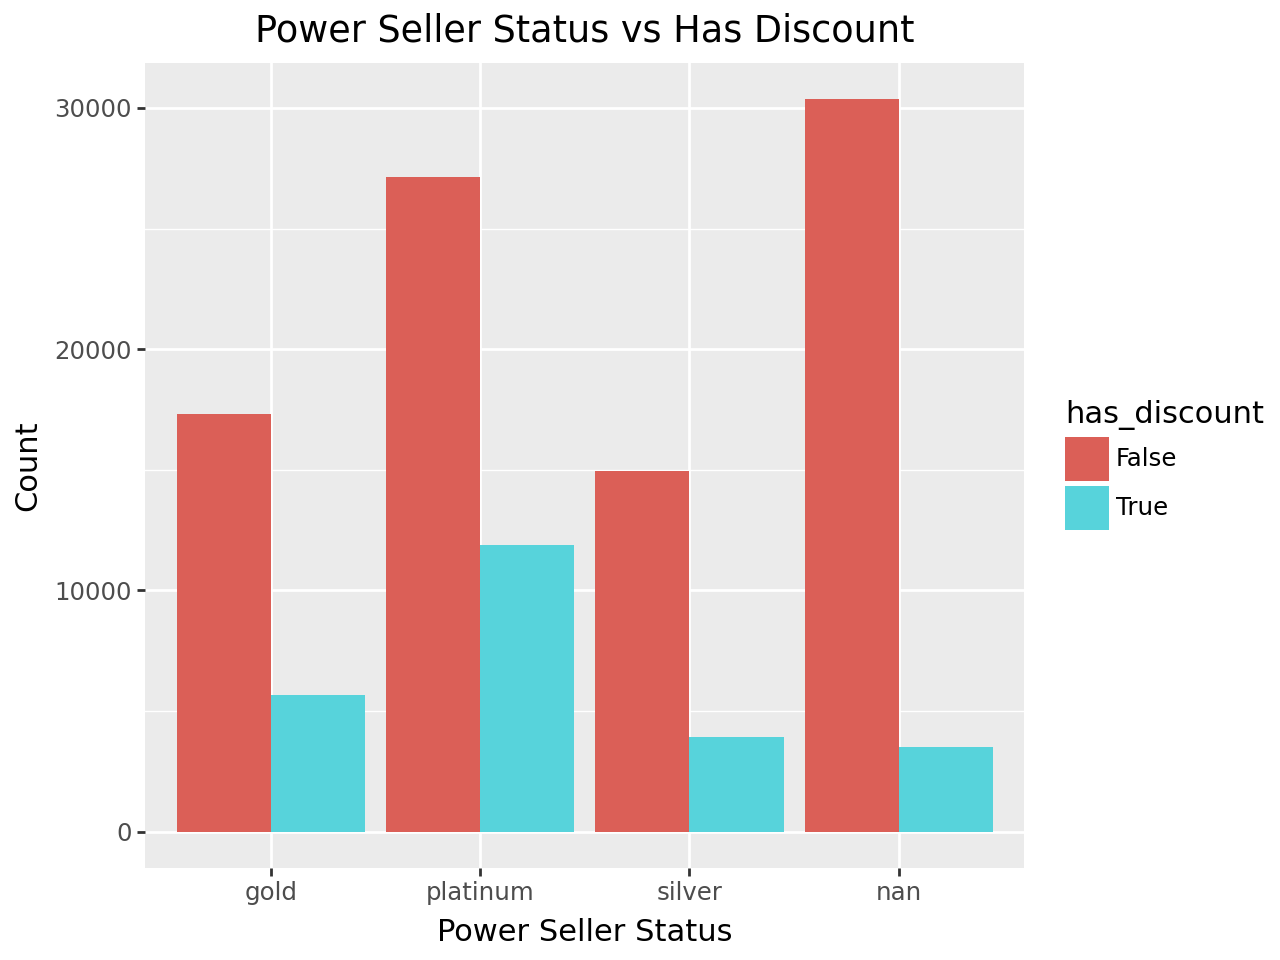

In [29]:
(ggplot(items_data, aes(x="power_seller_status", fill="has_discount")) +
    geom_bar(position="dodge") +
    labs(title="Power Seller Status vs Has Discount", x="Power Seller Status", y="Count")
)

Finalmente, si comparamos el power seller status con el level_id y la existencia o no de un descuento, vemos que solo aquellos seller con un *level_id* en *5_green*, pueden ser sellers *silver*, *gold* o *platinum*. Adicionalmente, si se ve cierta tendencia decreciente en la asignación de descuentos según dicho *level_id*, ya que la proporción es mayor para clientes con un nivel más alto y disminuye a medida que el nivel baja, hasta llegar al nivel *1_red*, donde los descuentos son inexistentes.

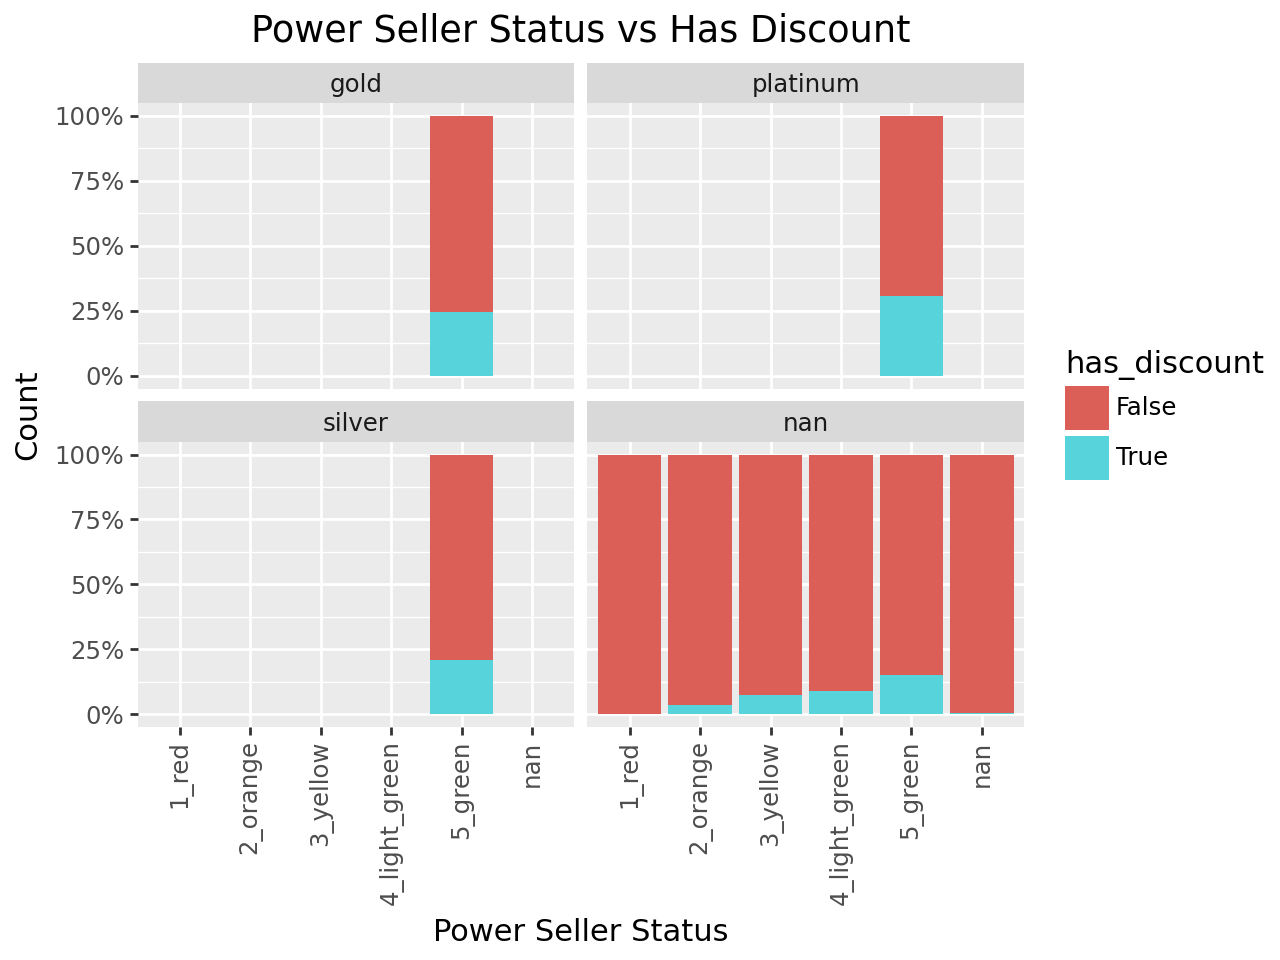

In [30]:
(ggplot(items_data, aes(x="level_id", fill="has_discount")) +
    geom_bar(position="fill") +
    scale_y_continuous(labels = percent_format())+
    labs(title="Power Seller Status vs Has Discount", x="Power Seller Status", y="Count") +
    theme(axis_text_x=element_text(angle=90)) +
    facet_wrap("~power_seller_status")
)